In [2]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import warnings
import numpy as np

import argparse

mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

In [8]:
dataset_name = 'cifar10'
#input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0)

qs_names = dataframe['qs'].unique()
print(qs_names.__class__)

<class 'numpy.ndarray'>


In [9]:
query_strategy_names = dataframe['qs'].unique()
print(query_strategy_names)

['RandomSampling' nan 'UncertaintySampling' 'DiscriminativeAL' 'CoreSet'
 'TypiClust' 'Badge']


In [10]:
result_score = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['score'].agg(['mean', 'std']).set_axis(['s_mean', 's_std'], axis=1)
result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(['t_mean', 't_std'], axis=1)
typiclust = result_time.loc['TypiClust']
print(result_time)

                                                t_mean     t_std
qs                  batch_size n_cycles step                    
Badge               16.0       30.0     0.0   0.848318  0.006405
                                        1.0   1.046597  0.011137
                                        2.0   1.016223  0.006266
                                        3.0   1.035946  0.007626
                                        4.0   1.036377  0.011584
...                                                ...       ...
UncertaintySampling 16.0       30.0     25.0  0.518744  0.103555
                                        26.0  0.476779  0.057113
                                        27.0  0.490464  0.062764
                                        28.0  0.459599  0.064368
                                        29.0  0.468522  0.046270

[180 rows x 2 columns]


In [13]:
# input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0)
dataframe = dataframe.dropna()

query_strategy_names = dataframe['qs'].unique()

result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(
    ['t_mean', 't_std'], axis=1)
b = result_time.loc['Badge']
qs_result_t_mean = b['t_mean'].to_numpy()
print(qs_result_t_mean)

[0.84831839 1.04659739 1.01622334 1.03594623 1.03637695 1.04169617
 1.05077825 1.06862721 1.06310067 1.07376952 1.07484975 1.08199196
 1.09323869 1.11439314 1.10074153 1.10090508 1.10425644 1.10669966
 1.10969963 1.12357235 1.11142149 1.11318455 1.11624756 1.11760416
 1.12158999 1.16749434 1.13027148 1.13446207 1.13779917 1.13949442]


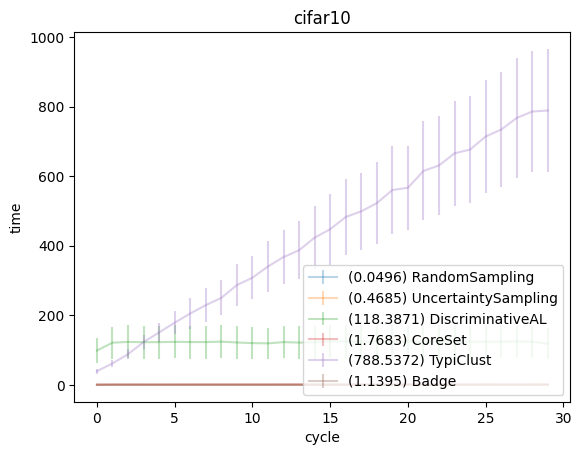

In [14]:
for qs_name in query_strategy_names:
    qs_result_t = result_time.loc[qs_name]
    qs_result_t_mean = qs_result_t['t_mean'].to_numpy()
    qs_result_t_std = qs_result_t['t_std'].to_numpy()

    plt.errorbar(np.arange(len(qs_result_t_mean)), qs_result_t_mean, qs_result_t_std,
                 label=f"({qs_result_t_mean[-1]:.4f}) {qs_name}", alpha=0.3)

plt.title(dataset_name)
plt.legend(loc='lower right')
plt.xlabel('cycle')
plt.ylabel('time')
# output_path = f'{dataset_name}_time.png'
output_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/result/{dataset_name}_time.png'
plt.savefig(output_path)